<a href="https://colab.research.google.com/github/sungjindo/league-of-legends/blob/main/lol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOL DATA**

평소 관심있게 지켜 본 게임에서 데이터를 가지고 분석해본다.
현재는 캐글에 있는 랭크 데이터를 사용해서 분석, 이후에 API를 통해 추출해낸다.


In [ ]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import os

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
%matplotlib inline

# 통계 및 기계학습 관련 라이브러리
from scipy import stats    # 통계 관련 라이브러리
from sklearn.model_selection import train_test_split, RandomizedSearchCV    # 데이터 셋 분류 라이브러리
from sklearn.utils import resample    # 데이터 업샘플링&다운샘플링 라이브러리
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN    # 복합샘플링 라이브러리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler    # 데이터 스케일링 라이브러리
from statsmodels.stats.outliers_influence import variance_inflation_factor    # 변수 간 다중공선성 확인(VIF) 라이브러리
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)    # 모델 정확도 검증 라이브러리
from sklearn.model_selection import cross_val_score    # validation  검증 라이브러리
from sklearn.linear_model import LogisticRegression    # 로지스틱 회귀 라이브러리
from sklearn.linear_model import Lasso    # 라쏘 라이브러리
from sklearn.linear_model import Ridge    # 릿지 라이브러리
import statsmodels.api as sm    # 통계분석 관련 라이브러리
from xgboost import XGBClassifier    # XGBoost 라이브러리
from sklearn.ensemble import RandomForestClassifier    # 랜덤포레스트 라이브러리
import warnings    # 경고문구 지우기


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/lol/dataset/games.csv", encoding = 'utf-8-sig')

In [ ]:
df

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [ ]:
# result.to_csv('/content/gdrive/My Drive/lol/dataset/games.csv', index = False, encoding = 'utf-8-sig')

In [ ]:
df

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [ ]:
df.index

RangeIndex(start=0, stop=51490, step=1)

In [ ]:
df.index.values

array([    0,     1,     2, ..., 51487, 51488, 51489])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   seasonId            51490 non-null  int64
 4   winner              51490 non-null  int64
 5   firstBlood          51490 non-null  int64
 6   firstTower          51490 non-null  int64
 7   firstInhibitor      51490 non-null  int64
 8   firstBaron          51490 non-null  int64
 9   firstDragon         51490 non-null  int64
 10  firstRiftHerald     51490 non-null  int64
 11  t1_champ1id         51490 non-null  int64
 12  t1_champ1_sum1      51490 non-null  int64
 13  t1_champ1_sum2      51490 non-null  int64
 14  t1_champ2id         51490 non-null  int64
 15  t1_champ2_sum1      51490 non-null  int64
 16  t1_champ2_sum2      51490 non-null  int6

In [ ]:
df.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


In [ ]:
df.value_counts

<bound method DataFrame.value_counts of            gameId   creationTime  gameDuration  seasonId  winner  firstBlood  \
0      3326086514  1504279457970          1949         9       1           2   
1      3229566029  1497848803862          1851         9       1           1   
2      3327363504  1504360103310          1493         9       1           2   
3      3326856598  1504348503996          1758         9       1           1   
4      3330080762  1504554410899          2094         9       1           2   
...           ...            ...           ...       ...     ...         ...   
51485  3308904636  1503076540231          1944         9       2           1   
51486  3215685759  1496957179355          3304         9       2           1   
51487  3322765040  1504029863961          2156         9       2           2   
51488  3256675373  1499562036246          1475         9       2           2   
51489  3317333020  1503612754059          1445         9       1           1   


In [ ]:
df

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [ ]:
# result.to_csv('/content/gdrive/My Drive/lol/dataset/games.csv', index = False, encoding = 'utf-8-sig')

# Train/Test 


In [ ]:
feature_columns = list(df.columns.difference(['winner']))
X = df[feature_columns]    # 변인변수들의 데이터 Set
y = df['winner']    # 종속변수 데이터를

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)    # Test Set을 0.2의 비율로 생성

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(41192, 60) (10298, 60) (41192,) (10298,)


In [ ]:
df['winner']

0        1
1        1
2        1
3        1
4        1
        ..
51485    2
51486    2
51487    2
51488    2
51489    1
Name: winner, Length: 51490, dtype: int64

In [ ]:
df[df['winner']==1]

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51472,3311241519,1503235106910,1729,9,1,2,1,1,0,1,...,0,0,0,0,0,134,89,31,64,40
51476,3324027965,1504116931395,2389,9,1,2,2,1,0,1,...,5,0,0,1,0,122,105,141,53,516
51479,3328396986,1504449732117,1557,9,1,1,1,1,0,2,...,1,0,0,2,0,40,91,18,67,117
51481,3269295840,1500411788750,2246,9,1,1,1,2,1,2,...,9,2,1,2,0,19,51,154,3,122


In [ ]:
df[df['winner']==2]

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
8,3318040883,1503686577549,1387,9,2,2,2,2,0,2,...,8,1,0,2,1,28,51,53,157,40
9,3327786881,1504385918871,2681,9,2,2,2,2,2,2,...,8,3,1,2,0,64,141,84,67,53
10,3325996400,1504273919929,1391,9,2,2,2,2,2,2,...,10,2,1,1,1,19,74,122,59,412
14,3329332855,1504479222082,2374,9,2,2,2,1,1,2,...,9,2,0,2,0,31,67,202,53,119
16,3316242660,1503574693354,2390,9,2,2,2,2,2,2,...,9,3,2,4,0,18,134,53,420,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51484,3316694929,1503589096685,2701,9,2,2,1,2,2,2,...,11,5,2,3,0,57,21,157,53,58
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157


In [ ]:
# 결측치 확인

mis_val = df.isnull().sum()
print('데이터의 총 결측치는 ' + str(sum(mis_val)) + '개 입니다.')

데이터의 총 결측치는 0개 입니다.


In [ ]:
# 전체 컬럼명 확인

#pd.set_option('display.max_seq_items', 10)
col_names = df.columns.tolist()
print(df.columns)

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [ ]:
# 컬럼별 고유값 개수 확인 및 고유값이 1개 or 2개인 경우의 컬럼명 추출

col_names_1 = []
col_names_2 = []

for col in df.columns.tolist() :
  print(col + '  :  ' + str(df[col].nunique()))
  if df[col].nunique() == 1 :
    col_names_1.append(col)
  elif df[col].nunique() == 2 :
    col_names_2.append(col)

gameId  :  51053
creationTime  :  51052
gameDuration  :  2590
seasonId  :  1
winner  :  2
firstBlood  :  3
firstTower  :  3
firstInhibitor  :  3
firstBaron  :  3
firstDragon  :  3
firstRiftHerald  :  3
t1_champ1id  :  138
t1_champ1_sum1  :  9
t1_champ1_sum2  :  9
t1_champ2id  :  138
t1_champ2_sum1  :  9
t1_champ2_sum2  :  9
t1_champ3id  :  138
t1_champ3_sum1  :  9
t1_champ3_sum2  :  9
t1_champ4id  :  138
t1_champ4_sum1  :  9
t1_champ4_sum2  :  9
t1_champ5id  :  138
t1_champ5_sum1  :  9
t1_champ5_sum2  :  9
t1_towerKills  :  12
t1_inhibitorKills  :  11
t1_baronKills  :  6
t1_dragonKills  :  7
t1_riftHeraldKills  :  2
t1_ban1  :  139
t1_ban2  :  139
t1_ban3  :  139
t1_ban4  :  139
t1_ban5  :  139
t2_champ1id  :  138
t2_champ1_sum1  :  9
t2_champ1_sum2  :  9
t2_champ2id  :  138
t2_champ2_sum1  :  9
t2_champ2_sum2  :  9
t2_champ3id  :  138
t2_champ3_sum1  :  9
t2_champ3_sum2  :  9
t2_champ4id  :  138
t2_champ4_sum1  :  9
t2_champ4_sum2  :  9
t2_champ5id  :  138
t2_champ5_sum1  :  9
t2_cham

In [ ]:
print(col_names_1)
print(col_names_2)

['seasonId']
['winner', 't1_riftHeraldKills', 't2_riftHeraldKills']


In [ ]:
df['winner']

0        1
1        1
2        1
3        1
4        1
        ..
51485    2
51486    2
51487    2
51488    2
51489    1
Name: winner, Length: 51490, dtype: int64

In [ ]:
df['winner'].value_counts()

1    26077
2    25413
Name: winner, dtype: int64

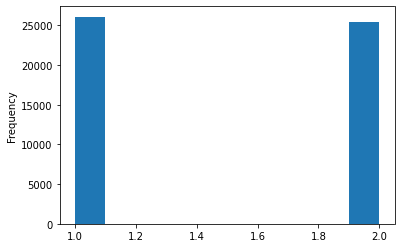

In [ ]:
df['winner'].plot.hist()

In [ ]:
# 특정 컬럼(고유값 개수가 1개) 제거 후 데이터프레임 재생성

for col in col_names_1 :
  col_names.remove(col)


df2 = df[col_names]

print(len(df2.columns))

60


In [ ]:
col_names = df2.columns.tolist()
col_names.remove('winner')
len(col_names)

59

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df2.drop(['winner'], axis=1).values # 독립변인들의 value값만 추출
y = df2['winner'].values # 종속변인 추출

X = StandardScaler().fit_transform(X) # x객체에 x를 표준화한 데이터를 저장

pd.DataFrame(X, columns = col_names).head()

,gameId,creationTime,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1id,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,0.674230,0.684444,0.227801,1.016113,-0.830132,-0.456281,0.087341,-0.777432,1.542001,-0.893224,...,-0.142314,-0.784133,-0.675419,-0.330238,1.779002,0.056398,-0.397690,-0.640314,-0.896272,-0.555365
1,-2.602018,-2.566634,0.036400,-0.905779,-0.830132,-0.456281,-1.101132,-0.777432,0.326223,0.039551,...,-0.919324,-0.784133,-0.675419,-1.146911,-0.562113,-0.947982,-0.397690,1.260434,-0.557603,3.035696
2,0.717576,0.725215,-0.662802,1.016113,-0.830132,-0.456281,0.087341,0.978269,-0.889556,-0.809190,...,-0.919324,-0.784133,-0.675419,-0.330238,-0.562113,0.475703,1.264607,0.119985,-0.499546,-0.779198
3,0.700369,0.719351,-0.145236,-0.905779,-0.830132,-0.456281,0.087341,-0.777432,-0.889556,-0.481458,...,-1.437331,-0.784133,-0.675419,-1.146911,-0.562113,0.543962,-0.874020,0.314934,-0.664042,-0.555365
4,0.809809,0.823449,0.510997,1.016113,-0.830132,-0.456281,0.087341,-0.777432,-0.889556,-0.800787,...,-0.660321,-0.784133,-0.675419,-0.330238,-0.562113,-0.216637,-0.942068,0.899780,0.129410,-0.876516


In [ ]:
# PCA 주성분분석
from sklearn.decomposition import PCA

pca = PCA(random_state=123)
X_pca = pca.fit_transform(X)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.091276
1     0.142240
2     0.178180
3     0.204950
4     0.231401
5     0.257684
6     0.283604
7     0.309029
8     0.334181
9     0.359301
10    0.384342
11    0.408972
12    0.433529
13    0.457061
14    0.476854
15    0.496016
16    0.514996
17    0.533801
18    0.552073
19    0.570216
20    0.588261
21    0.606288
22    0.624140
23    0.641973
24    0.659632
25    0.677253
26    0.694791
27    0.712302
28    0.729727
29    0.746784
30    0.763813
31    0.780693
32    0.797484
33    0.814044
34    0.830107
35    0.845232
36    0.860154
37    0.871666
38    0.882851
39    0.893417
40    0.903902
41    0.914143
42    0.924289
43    0.934114
44    0.943774
45    0.953269
46    0.962643
47    0.969523
48    0.975985
49    0.981530
50    0.986960
51    0.991603
52    0.994463
53    0.996615
54    0.998669
55    0.999998
56    1.000000
dtype: float64

In [ ]:
df[['gameId', 'creationTime', 'gameDuration', 'seasonId']]

,gameId,creationTime,gameDuration,seasonId
0,3326086514,1504279457970,1949,9
1,3229566029,1497848803862,1851,9
2,3327363504,1504360103310,1493,9
3,3326856598,1504348503996,1758,9
4,3330080762,1504554410899,2094,9
...,...,...,...,...
51485,3308904636,1503076540231,1944,9
51486,3215685759,1496957179355,3304,9
51487,3322765040,1504029863961,2156,9
51488,3256675373,1499562036246,1475,9


In [ ]:
df[['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       ]]

,firstBlood,firstTower,firstInhibitor,firstBaron
0,2,1,1,1
1,1,1,1,0
2,2,1,1,1
3,1,1,1,1
4,2,1,1,1
...,...,...,...,...
51485,1,2,2,0
51486,1,1,2,2
51487,2,2,2,0
51488,2,2,2,0


In [ ]:
df[['firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       ]]

,firstDragon,firstRiftHerald,t1_champ1id,t1_champ1_sum1,t1_champ1_sum2,t1_champ2id,t1_champ2_sum1,t1_champ2_sum2
0,1,2,8,12,4,432,3,4
1,1,1,119,7,4,39,12,4
2,2,0,18,4,7,141,11,4
3,1,0,57,4,12,63,4,14
4,1,0,19,4,12,29,11,4
...,...,...,...,...,...,...,...,...
51485,2,0,19,12,4,429,4,7
51486,2,2,90,4,14,32,4,11
51487,1,0,141,11,4,18,7,4
51488,2,0,121,11,4,236,4,7


In [ ]:
df[['t1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2']]

,t1_champ3id,t1_champ3_sum1,t1_champ3_sum2,t1_champ4id,t1_champ4_sum1,t1_champ4_sum2,t1_champ5id,t1_champ5_sum1,t1_champ5_sum2
0,96,4,7,11,11,6,112,4,14
1,76,4,3,10,4,14,35,4,11
2,267,3,4,68,4,12,38,12,4
3,29,4,7,61,4,1,36,11,4
4,40,4,3,119,4,7,134,7,4
...,...,...,...,...,...,...,...,...,...
51485,91,4,14,432,4,14,64,4,11
51486,31,12,4,412,14,4,18,4,7
51487,432,3,4,81,12,4,68,4,12
51488,420,4,12,201,4,3,99,4,14


In [ ]:
df[['t1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills']]

,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills
0,11,1,2,3,0
1,10,4,0,2,1
2,8,1,1,1,0
3,9,2,1,2,0
4,9,2,1,3,0
...,...,...,...,...,...
51485,2,0,0,0,0
51486,5,4,0,2,0
51487,0,0,0,1,0
51488,0,0,0,0,0


In [ ]:
df[['t1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2'
       ]]

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_champ1id,t2_champ1_sum1,t2_champ1_sum2
0,92,40,69,119,141,104,11,4
1,51,122,17,498,19,54,4,12
2,117,40,29,16,53,69,4,7
3,238,67,516,114,31,90,14,4
4,90,64,412,25,31,37,3,4
...,...,...,...,...,...,...,...,...
51485,114,18,11,157,497,45,12,4
51486,157,164,122,99,420,102,11,4
51487,238,31,24,53,11,1,4,12
51488,119,64,51,157,29,21,7,4


In [ ]:
df[['t2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2']]

,t2_champ2id,t2_champ2_sum1,t2_champ2_sum2,t2_champ3id,t2_champ3_sum1,t2_champ3_sum2,t2_champ4id,t2_champ4_sum1,t2_champ4_sum2
0,498,4,7,122,6,4,238,14,4
1,25,4,14,120,11,4,157,4,14
2,412,14,4,126,4,12,24,4,11
3,19,11,4,412,4,3,92,4,14
4,59,4,12,141,11,4,38,4,12
...,...,...,...,...,...,...,...,...,...
51485,83,12,4,67,4,7,40,3,4
51486,429,7,4,89,3,4,75,4,12
51487,119,7,4,33,11,4,43,12,4
51488,56,4,12,25,4,14,30,12,4


In [ ]:
df[['t2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills']]

,t2_champ5id,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills
0,412,4,3,5,0,0,1
1,92,4,7,2,0,0,0
2,22,7,4,2,0,0,1
3,22,4,7,0,0,0,0
4,51,4,7,3,0,0,1
...,...,...,...,...,...,...,...
51485,79,11,4,10,2,0,4
51486,45,14,4,11,7,4,4
51487,99,14,4,10,2,0,2
51488,11,11,4,11,3,0,1


In [ ]:
df[['t2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',
       't2_ban5']]

,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,1,114,67,43,16,51
1,0,11,67,238,51,420
2,0,157,238,121,57,28
3,0,164,18,141,40,51
4,0,86,11,201,122,18
...,...,...,...,...,...,...
51485,0,55,-1,90,238,157
51486,1,157,55,119,154,105
51487,0,113,122,53,11,157
51488,0,154,39,51,90,114
